# Análise exploratória: Desvendando o Impacto dos Fatores Externos nas Notas Escolares

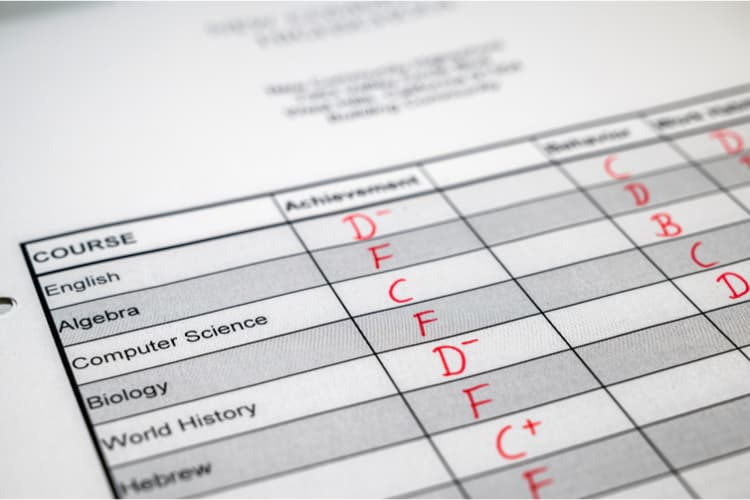

In [1]:
from IPython.display import Image
Image("imagem_analise.jpg")

A fase escolar representa um dos momentos mais cruciais na jornada de uma pessoa. Durante esse período, o conhecimento adquirido não apenas molda o futuro do estudante, mas também pode determinar sua trajetória para uma universidade de excelência. Contudo, é evidente que nem todos alcançam um desempenho igualmente satisfatório. Surge, então, a indagação: quais os fatores que influenciam essas disparidades? Será que o envolvimento dos pais desempenha um papel crucial? Por que alguns indivíduos se destacam em testes e provas, enquanto outros enfrentam dificuldades? São questões como essas que conduzem nossa análise, buscando compreender aspectos cruciais dessa importante fase da vida.

Nessa análise iremos utilizar o conjunto de dados do Kaggle, que pode ser encontrado [clicando aqui](https://www.kaggle.com/datasets/bhavikjikadara/student-study-performance)


<b><i>A análise está divida da seguinte maneira:</i></b>
* Primeira parte: Visualizar a estrutura do DataSet
* Segunda parte: Análise Univariada, visando entender como está distribuido cada atributo
* Terceira parte: Análise Bivariada, visando entender o relacionamento/correlação entre 2 atributos
* Quarta parte: Análise Multivaridada, visando entender o relacionamento/correlação entre 3 ou mais atributos
* Quinta parte: Conclusão

<b><i>Perguntas que tentaremos responder:</i></b>
* O gênero dos alunos impacta em suas notas escolares?
* Existe alguma relação entre o nível de escolaridade dos pais e o desempenho acadêmico dos alunos?
* Existe algum problema socioeconômico entre os alunos? O que isso revela sobre seu desempenho acadêmico?
* Será que a participação em cursos preparatórios antes dos testes está associada ao desempenho dos alunos?

# Carregando Bibliotecas

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib as mpl

In [22]:
#Padronizando os gráficos

#Definindo o fundo
plt.style.use("ggplot")

#Definindo um padrão de tamanho
mpl.rcParams["figure.figsize"] = [8, 6]

#Definindo as cores e tamanho das legendas
mpl.rcParams["axes.titlecolor"] = "black"
mpl.rcParams["legend.fontsize"] = 12

mpl.rcParams["xtick.color"] = "black"
mpl.rcParams["xtick.labelsize"] = 11

mpl.rcParams["ytick.color"] = "black"
mpl.rcParams["ytick.labelsize"] = 11

# Carregando o DataSet

In [23]:
performance = pd.read_csv("study_performance.csv", sep = ",")

# Dicionário de Variáveis

* <b>gender:</b> sexo do aluno (Masculino/Feminino)
* <b>race_ethnicity:</b> etnia dos alunos (Grupo: A,B, C, D, E)
* <b>parental_level_of_education:</b> escolaridade final dos pais (bacharelado, alguma faculdade, mestrado, diploma de associado, ensino médio)
* <b>lunch:</b> almoçar antes do teste (padrão ou gratuito/desconto)
* <b>test_preparation_course:</b> completou ou não o curso preparatório antes do teste
* <b>math_score:</b> pontuação de matemática
* <b>reading_score:</b> pontuação de leitura
* <b>writing_score:</b> pontuação de escrita

# Primeira parte: Visualizar a estrutura do DataSet

In [24]:
performance.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [25]:
performance.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [26]:
performance.duplicated().sum()

0

In [27]:
performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


<b>DataSet possui 1000 linhas e 8 colunas</b>

In [28]:
performance.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [29]:
performance.select_dtypes(include = "object").describe()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


# Segunda parte: Análise Univariada

In [30]:
performance.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


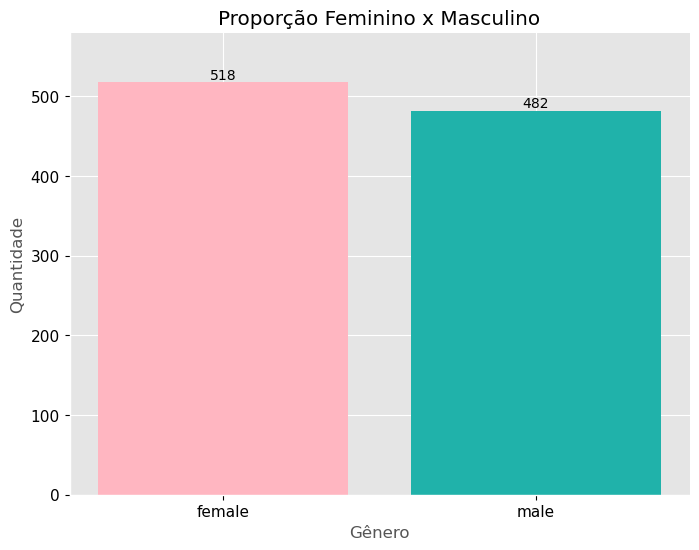

In [31]:
fig, axes = plt.subplots()
gender_cat = performance["gender"].value_counts()
axes.bar(gender_cat.index, gender_cat.values, color = ["#FFB6C1", "#20B2AA"]);
axes.set_title("Proporção Feminino x Masculino");
axes.set_xlabel("Gênero");
axes.set_ylabel("Quantidade");
axes.set_ylim(0, 580)

#Plotar a quantidade de cada gênero
for i, v in enumerate(gender_cat):
    axes.text(i, v, str(v), color = "black", ha = "center", va = "bottom")

axes.spines["top"].set_visible(False);
axes.spines["right"].set_visible(False);

Nossos dados possui uma quantidade maior de mulheres do que de homens

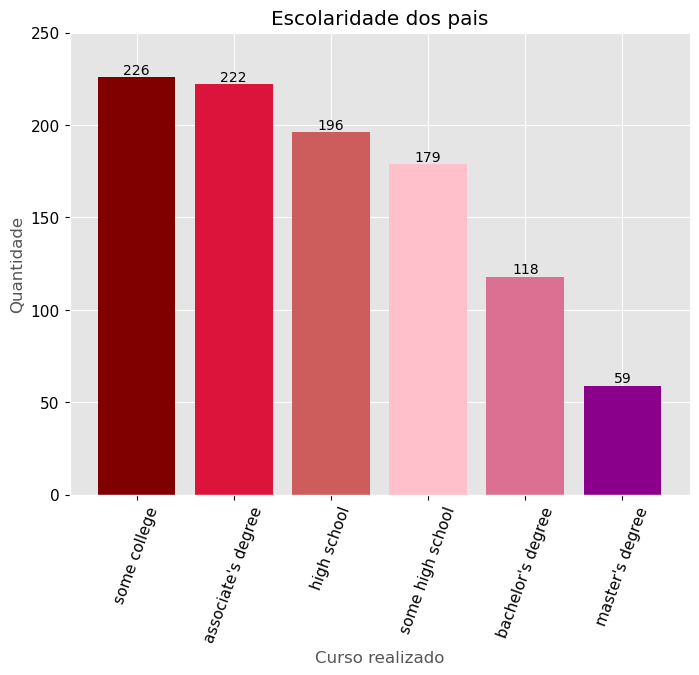

In [32]:
colors = ["#800000", "#DC143C", "#CD5C5C", "#FFC0CB", "#DB7093", "#8B008B"];
parental_qtd = performance["parental_level_of_education"].value_counts()
fig, axes = plt.subplots();
axes.bar(parental_qtd.index, parental_qtd.values,
        color = colors);
axes.set_ylim(0, 250)
plt.xticks(rotation = 70);
for i, v in enumerate(parental_qtd):
    axes.text(i, v, str(v), color = "black", ha = "center", va = "bottom")
axes.set_title("Escolaridade dos pais");
axes.set_xlabel("Curso realizado");
axes.set_ylabel("Quantidade");
axes.spines["top"].set_visible(False);
axes.spines["right"].set_visible(False);

Com esse gráfico podemos retirar alguns insights:
* 22.6% dos pais desses alunos iniciaram uma graduação mas não completaram.
* 22.2% dos pais realizaram um "associate's degree", que seria uma espécie de curso técno, o que pode nos levar a uma suposição de que essas pessoas não possuem uma condição financeira muito sólida, pois os cursos de "associate's degree" geralmente possuem um valor muito abaixo se compararmos com uma graduação convencional.
* 19.6% cursaram somente o ensino médio.
* 17.9% não completaram o ensino médio.
* 11.8% possuem uma graduação.
* 5.9% possuem um mestrado.
* Ou seja, uma pequena parcela dos pais dos alunos possuem uma especialização

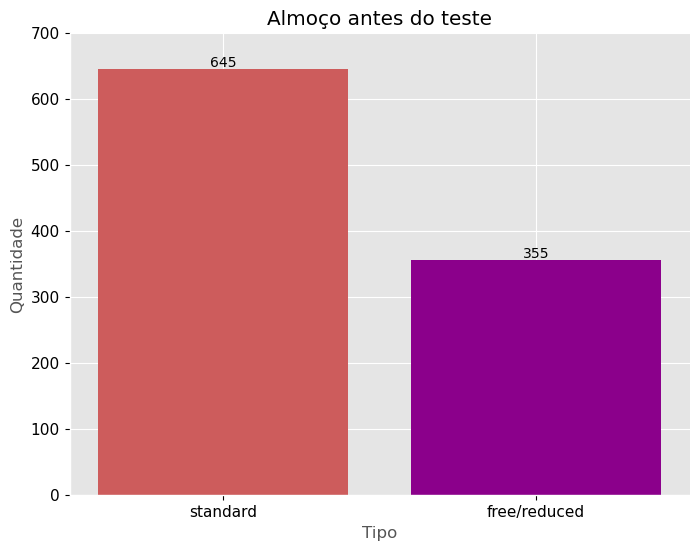

In [33]:
fig, axes = plt.subplots();
lunch_qtd = performance["lunch"].value_counts()
axes.bar(lunch_qtd.index, lunch_qtd.values,
        color = ["#CD5C5C", "#8B008B"]);
axes.set_ylim(0, 700)
for i, v in enumerate(lunch_qtd):
    axes.text(i, v, str(v), color = "black", ha = "center", va = "bottom")
axes.set_title("Almoço antes do teste");
axes.set_xlabel("Tipo");
axes.set_ylabel("Quantidade");
axes.spines["top"].set_visible(False);
axes.spines["right"].set_visible(False);

Você pode estar se perguntando, o que o tipo de almoço tem haver com a nota do teste? Temos 2 tipos de almoço, o padrão (standard) e o gratuito/com desconto (free/reduced). Essa variável é importante para tentar enteder as condições socioeconômicas dos alunos, pois os que recebem almoço gratuito ou com desconto podem vir de uma família com um menor poder aquisitivo, o que pode estar correlacionado com outros fatores que afetam o desempenho do aluno.

In [34]:
pd.DataFrame(performance["lunch"].value_counts(normalize = True)*100)

,proportion
lunch,
standard,64.5
free/reduced,35.5


Isso pode nos levar que 35.5% dos alunos não possuem uma condição financeira muito boa

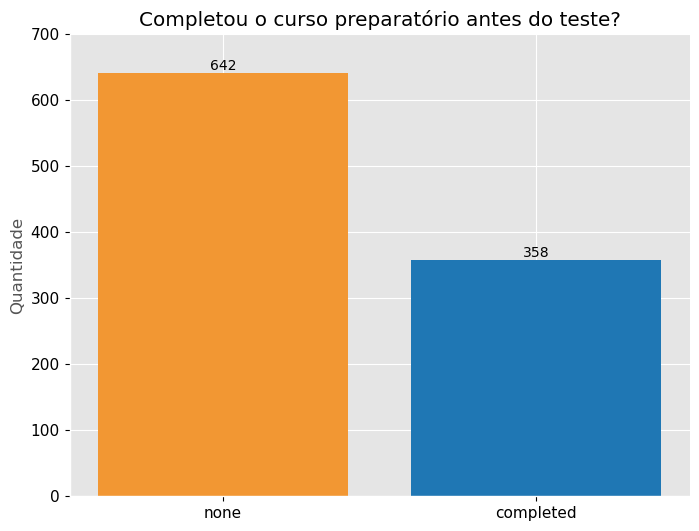

In [35]:
fig, axes = plt.subplots();
performance_qtd = performance["test_preparation_course"].value_counts()
axes.bar(performance_qtd.index, performance_qtd.values,
        color = ["#f29733", "#1f77b4"]);
axes.set_ylim(0, 700)
for i, v in enumerate(performance_qtd):
    axes.text(i, v, str(v), color = "black", ha = "center", va = "bottom")
axes.set_title("Completou o curso preparatório antes do teste?");
axes.set_ylabel("Quantidade")
axes.spines["top"].set_visible(False);
axes.spines["right"].set_visible(False);

In [36]:
pd.DataFrame(performance["test_preparation_course"].value_counts(normalize = True)*100)

,proportion
test_preparation_course,
none,64.2
completed,35.8


Uma grande parcela dos estudantes (64%) não realizaram o curso preparatório.

In [37]:
#Vamos criar uma nova coluna contendo os valores da nota média total dos alunos (juntando as notas das 3 matérias e dividindo pelo total)
average = (performance.loc[:, ["math_score", "reading_score", "writing_score"]]
         .apply(lambda x: (x.sum())/len(x), axis = 1).round(0).astype(int))
performance["total_average"] = average

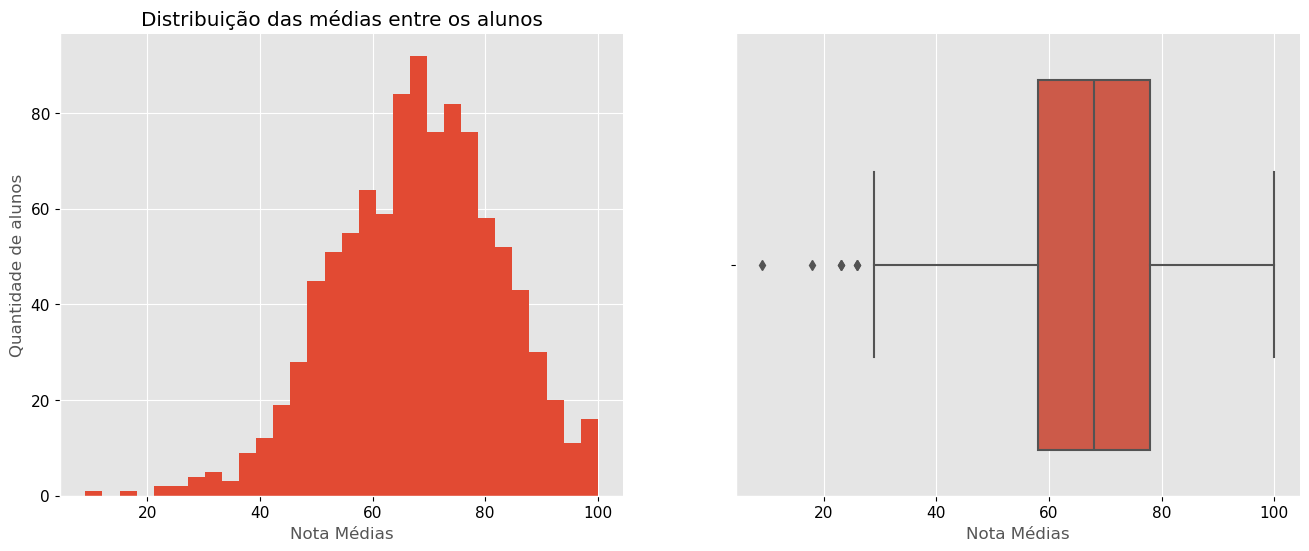

In [38]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 6));
axes[0].hist(performance["total_average"], bins = 30);
axes[0].set_title("Distribuição das médias entre os alunos");
axes[0].set_xlabel("Nota Médias");
axes[0].set_ylabel("Quantidade de alunos");
axes[0].spines["top"].set_visible(False);
axes[0].spines["right"].set_visible(False);

sns.boxplot(ax = axes[1], x = performance["total_average"]);
axes[1].set_xlabel("Nota Médias");
axes[1].spines["top"].set_visible(False);
axes[1].spines["right"].set_visible(False);

Analisando a distribuição das médias dos estudantes, conseguimos perceber que a mediana é de 70 e as notas estão distribuídas entre 55/60 e 80. Que é o padrão de notas de toda escola, onde poucos tiram uma nota extremamente baixa e poucos tiram uma nota extremamente alta.

<b><i>O que temos até agora?</i></b>
* Sabemos que existem mais alunas do que alunos
* Pouquíssimos pais possuem uma graduação/Mestrado
* Temos uma boa parcela de 35% que almoça de graça, indicando uma possível situação financeira debilitada
* 64% não fizeram o curso preparatório antes do teste
* As médias das notas dos alunos estão distribuídas entre 60 e 80

# Terceira parte: Análise Bivariada

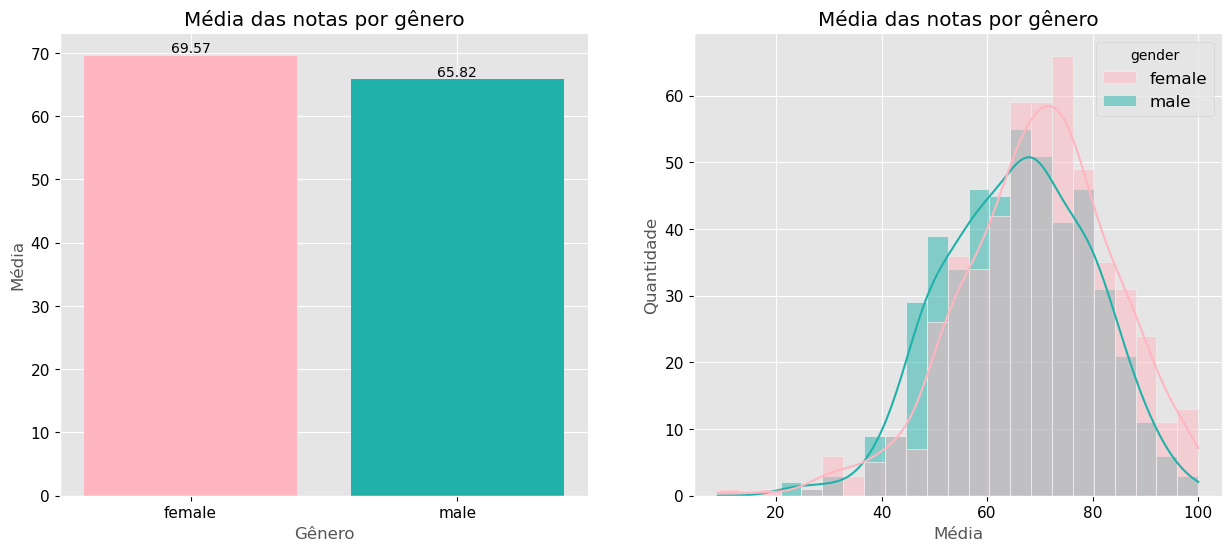

In [39]:
gender_media = performance.groupby("gender")["total_average"].mean()

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 6));
axes[0].bar(gender_media.index, gender_media, color = ["#FFB6C1", "#20B2AA"]);
axes[0].set_title("Média das notas por gênero");
axes[0].set_xlabel("Gênero");
axes[0].set_ylabel("Média");
axes[0].spines["top"].set_visible(False);
axes[0].spines["right"].set_visible(False);
for i, v in enumerate(gender_media):
    axes[0].text(i, v, f"{v:.2f}", color = "black", ha = "center", va = "bottom")

sns.histplot(ax = axes[1], data = performance, x = "total_average", hue = "gender", palette = ["#FFB6C1", "#20B2AA"], kde = True);
axes[1].set_title("Média das notas por gênero");
axes[1].set_xlabel("Média");
axes[1].set_ylabel("Quantidade");
axes[1].spines["top"].set_visible(False);
axes[1].spines["right"].set_visible(False);

* O primeiro gráfico mostra que gênero feminino possui uma média geral maior que o gênero masculino
* O segundo gráfico mostra que o gênero feminino possui uma distribuição da média voltada para direita, ou seja, uma média maior
* <b>Podemos concluir que o gênero feminino tende a ter uma média maior que o gênero masculino</b>

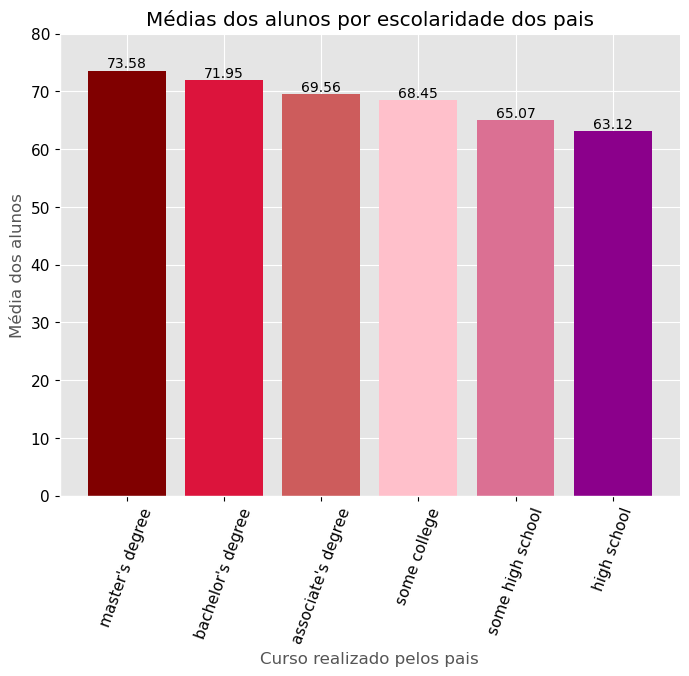

In [40]:
parental_level_media = (performance.groupby("parental_level_of_education")["total_average"]
                        .mean().sort_values(ascending = False))

fig, axes = plt.subplots();
axes.bar(parental_level_media.index, parental_level_media, color = colors);
plt.xticks(rotation = 70);
axes.set_ylim(0, 80)
for i, v in enumerate(parental_level_media):
    axes.text(i, v, f"{v:.2f}", color = "black", ha = "center", va = "bottom")
axes.set_title("Médias dos alunos por escolaridade dos pais");
axes.set_xlabel("Curso realizado pelos pais");
axes.set_ylabel("Média dos alunos");
axes.spines["top"].set_visible(False);
axes.spines["right"].set_visible(False);

* Os estudantes cujos pais possuem alguma forma de especialização (mestrado, graduação, associate's degree) tendem a alcançar médias de notas mais altas em comparação aos demais. Isso se deve, em parte, à valorização dos estudos por parte dos pais, que geralmente têm um nível mais elevado de educação, criando assim um ambiente propício ao aprendizado para seus filhos.
* Em seguida, os alunos cujos pais começaram uma graduação, mas não a concluíram, também apresentam médias relativamente altas. Essa tendência reflete o interesse inicial dos pais na educação, o que pode influenciar positivamente o desempenho acadêmico de seus filhos.
* De forma interessante, os alunos cujos pais não concluíram o ensino médio obtêm notas superiores aos alunos cujos pais finalizaram essa etapetaducacional. Uma possível explicação para isso é que os pais que não concluíram o ensino médio podem ter sido impedidos por circunstâncias externas, não por falta de valorização da educação. Assim, eles reconhecem a importância dos estudos e transmitem esse valor aos filhos. Por outro lado, os pais que concluíram o ensino médio, mas optaram por não seguir uma graduação, podem dem inadvertidamesubestimar a importância da educação, influenciando negativamente seus filhos nesse aspecto.
* <b>Portanto, podemos concluir que o nível de escolaridade dos pais influencia no desempenho acadêmico dos alunos.</b>



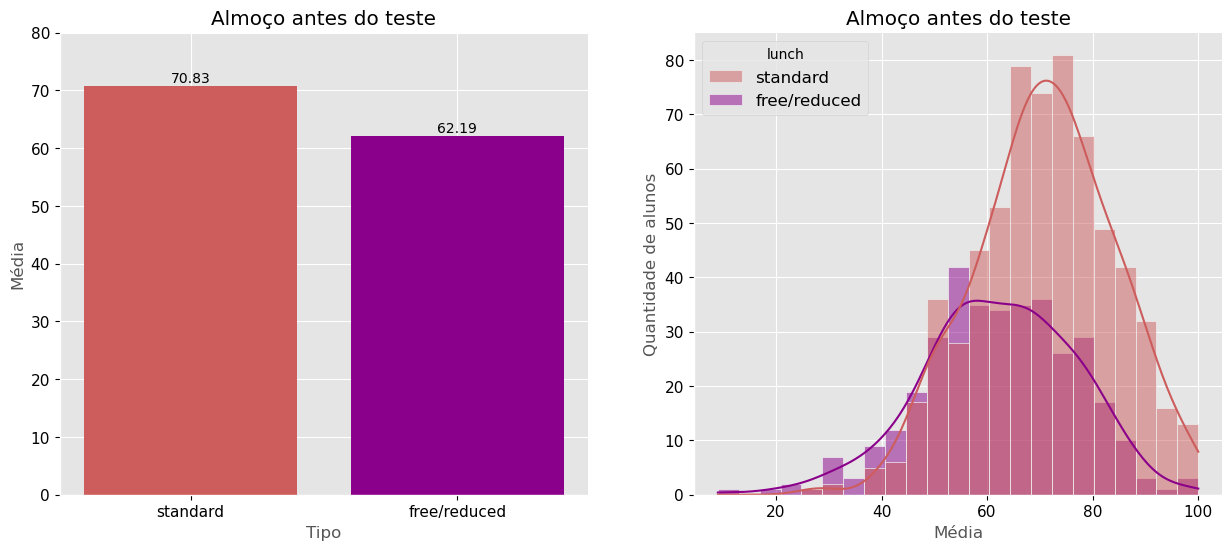

In [152]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 6));

lunch_median = performance.groupby("lunch")["total_average"].mean().sort_values(ascending = False)
axes[0].bar(lunch_median.index, lunch_median.values, color = ["#CD5C5C", "#8B008B"]);
axes[0].set_title("Almoço antes do teste");
axes[0].set_xlabel("Tipo");
axes[0].set_ylabel("Média");
axes[0].spines["top"].set_visible(False);
axes[0].spines["right"].set_visible(False);
axes[0].set_ylim(0, 80)
for i, v in enumerate(lunch_median.values):
    axes[0].text(i, v, f"{v:.2f}", color = "black", ha = "center", va = "bottom")

sns.histplot(ax = axes[1], data = performance, x = "total_average", hue = "lunch", palette = ["#CD5C5C", "#8B008B"], kde = True); 
axes[1].set_title("Almoço antes do teste");
axes[1].set_xlabel("Média");
axes[1].set_ylabel("Quantidade de alunos");
axes[1].spines["top"].set_visible(False);
axes[1].spines["right"].set_visible(False);

* No primeiro gráfico, é evidente que os alunos que adquirem o almoço padrão tendem a ter uma média de nota geral mais alta em comparação com aqueles que recebem a refeição gratuitamente ou com desconto.
* O segundo gráfico revela a dispersão das médias das notas entre os alunos que pagam pelo almoço e os que o recebem gratuitamente. Novamente, observa-se uma tendência de que os alunos que pagam pelo almoço apresentam médias mais elevadas.
* Esses resultados reforçam a teoria anteriormente proposta na análise univariada, sugerindo que alunos que recebem o almoço gratuitamente ou com desconto geralmente possuem um poder aquisitivo mais baixo em comparação com aqueles que pagam. Essa diferença pode ser um fator determinante para o desempenho acadêmico, talvez devido à falta de acesso a melhores oportunidades de estudo ou a falta de apoio parental em relação aos estudos.
* <b>Concluímos, portanto, que o tipo de almoço oferecido aos alunos influencia em seu desempenho acadêmico, refletindo questões socioeconômicas subjacentes.</b>

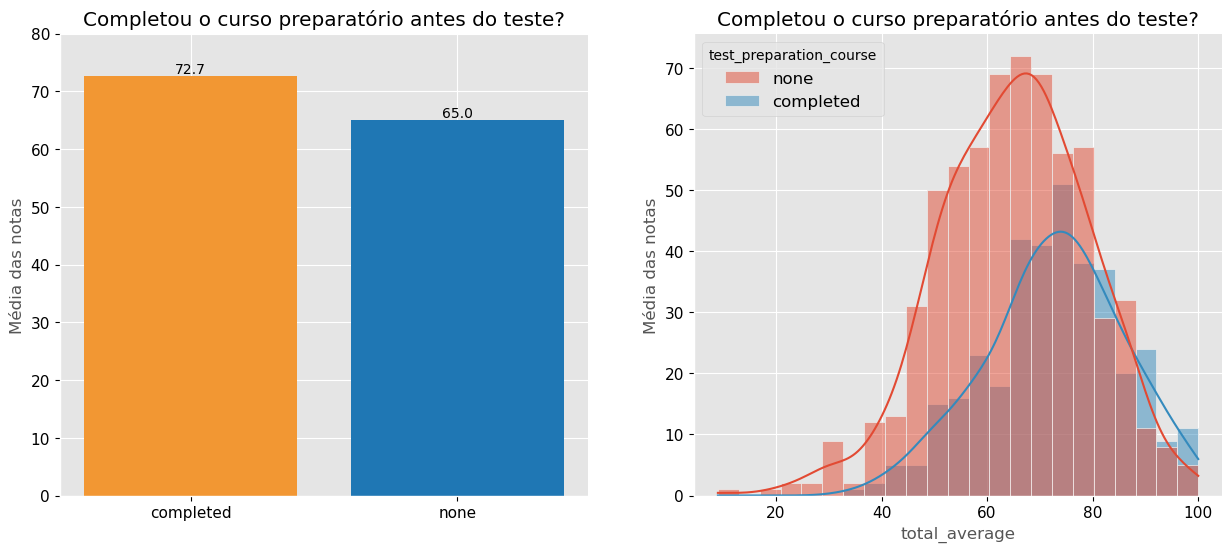

In [150]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 6));
test_preparation_median = performance.groupby("test_preparation_course")["total_average"].mean()
axes[0].bar(test_preparation_median.index, test_preparation_median.values, color = ["#f29733", "#1f77b4"]);
axes[0].set_title("Completou o curso preparatório antes do teste?");
axes[0].set_ylabel("Média das notas");
axes[0].spines["top"].set_visible(False);
axes[0].spines["right"].set_visible(False);
axes[0].set_ylim(0, 80)
for i, v in enumerate(test_preparation_median):
    axes[0].text(i, v, f"{v:.1f}", color = "black", ha = "center", va = "bottom")

sns.histplot(ax = axes[1], data = performance, x = "total_average", hue = "test_preparation_course", kde = True);
axes[1].set_title("Completou o curso preparatório antes do teste?");
axes[1].set_ylabel("Média das notas");
axes[1].spines["top"].set_visible(False);
axes[1].spines["right"].set_visible(False);

* No primeiro gráfico, observamos que os alunos que concluíram o curso preparatório antes do teste apresentam uma média de notas mais alta em comparação com aqueles que não o completaram.
* O segundo gráfico de distribuição revela uma proporção significativamente maior de alunos que não concluíram o curso preparatório (esta informação pode ser visualizada no gráfico durante a análise univariada). No entanto, a média de notas desses alunos que não concluíram o curso é de 65, o que representa uma diferença de 8.5 pontos em relação à média dos alunos que completaram o curso.
* Os poucos alunos que concluíram o curso se destacaram com uma nota superior em comparação com aqueles que não o concluíram.
* <b>Portanto, concluímos que o curso preparatório teve uma influência positiva nas notas dos alunos.</b>

# Quarta parte: Análise Multivaridada

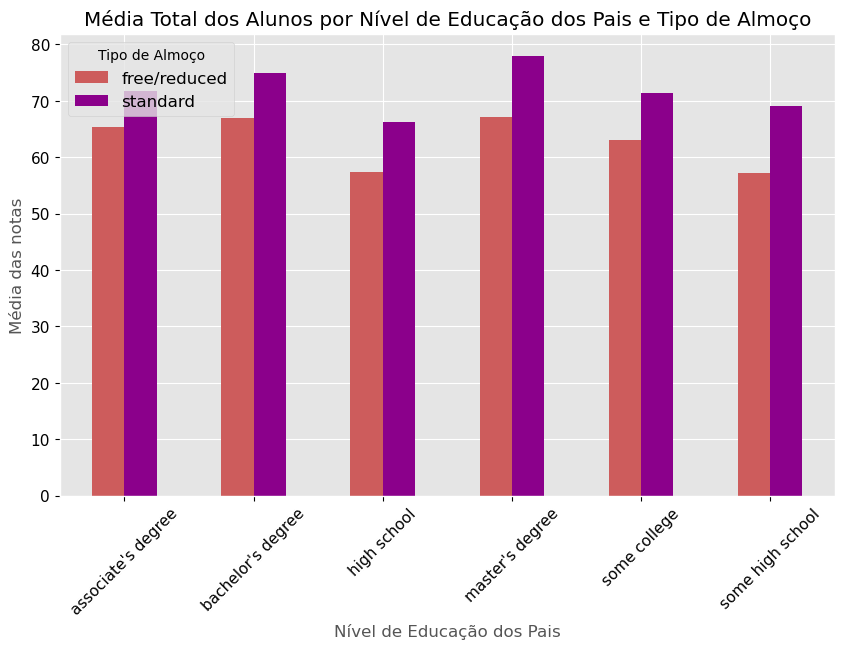

In [85]:
pivot_table = pd.pivot_table(data = performance, index = "parental_level_of_education", columns = "lunch", values = "total_average")
pivot_table.plot(kind = "bar", figsize=(10, 6), color = ["#CD5C5C", "#8B008B"]);
plt.title("Média Total dos Alunos por Nível de Educação dos Pais e Tipo de Almoço");
plt.xlabel("Nível de Educação dos Pais");
plt.ylabel("Média das notas");
plt.xticks(rotation=45) ;
plt.legend(title="Tipo de Almoço");

In [29]:
pivot_table

lunch,free/reduced,standard
parental_level_of_education,,
associate's degree,65.402597,71.765517
bachelor's degree,67.000000,74.891892
high school,57.428571,66.285714
master's degree,67.083333,78.028571
some college,62.974684,71.387755
some high school,57.196721,69.144068


* Tanto pela visualização gráfica quanto pela tabela, <b>podemos confirmar nossa teoria de que os alunos que pagam pelo almoço (standard) tendem a obter notas mais altas em comparação com aqueles que recebem o almoço gratuitamente ou com descontos (free/reduced)</b>.

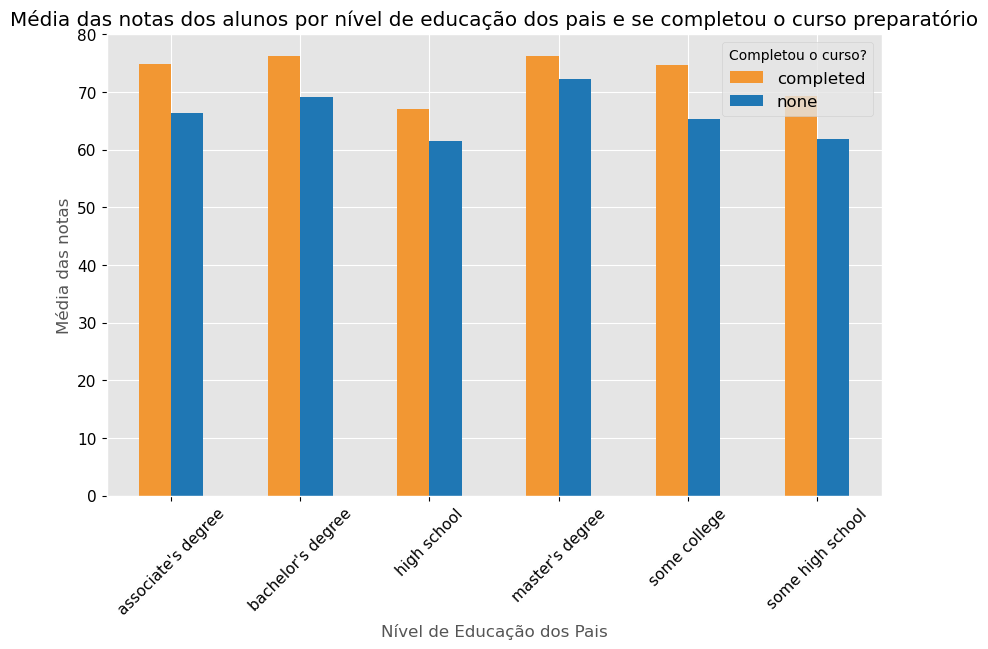

In [86]:
pivot_table_parental_average = pd.pivot_table(performance, index = "parental_level_of_education",
                                              columns = "test_preparation_course", 
                                              values = "total_average")
pivot_table_parental_average.plot(kind = "bar", figsize=(10, 6), color = ["#f29733", "#1f77b4"]);
plt.title("Média das notas dos alunos por nível de educação dos pais e se completou o curso preparatório");
plt.xlabel("Nível de Educação dos Pais");
plt.ylabel("Média das notas");
plt.xticks(rotation=45) ;
plt.legend(title="Completou o curso?");

In [31]:
pivot_table_parental_average

test_preparation_course,completed,none
parental_level_of_education,,
associate's degree,74.914634,66.421429
bachelor's degree,76.304348,69.166667
high school,67.017857,61.564286
master's degree,76.300000,72.179487
some college,74.649351,65.241611
some high school,69.298701,61.882353


* Tanto pela visualização gráfica quanto pela tabela, <b>podemos confirmar nossa hipótese de que os alunos que completaram o curso preparatório obtiveram notas mais altas do que aqueles que não o concluíram.</b>

# Quinta parte: Conclusão

<b><i>Após uma análise detalhada, identificamos insights importantes:</i></b>

* Embora o gênero não seja um fator determinante nas notas escolares, notamos uma tendência de notas mais altas entre as alunas em comparação aos alunos do sexo masculino. Isso sugere que as alunas podem ter uma abordagem mais focada e organizada em relação aos estudos.
* Há uma clara associação entre o nível de educação dos pais e o desempenho acadêmico dos alunos. Aqueles cujos pais possuem formação superior, como graduação, mestrado ou cursos técnicos, tendem a obter notas mais altas. Isso indica que o ambiente familiar e o valor atribuído à educação pelos pais podem influenciar positivamente o sucesso acadêmico dos alunos.
* A discrepância na disponibilidade de almoço entre os alunos revela uma questão socioeconômica relevante. Alunos que recebem almoço gratuito ou com desconto tendem a ter notas mais baixas em comparação com aqueles que podem pagar pelo almoço. Essa observação destaca as disparidades socioeconômicas que podem afetar diretamente o desempenho escolar.
* O curso preparatório demonstrou ser altamente benéfico. Embora apenas alguns alunos tenham completado o curso, eles alcançaram notas consideravelmente mais altas do que aqueles que não participaram. Isso ressalta a importância do preparo adicional antes de testes e exames, sugerindo que esse investimento de tempo e esforço pode resultar em um melhor desempenho acadêmico.